In [19]:
import gpuRIR
import os
import random
import numpy as np
import math
from math import ceil
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

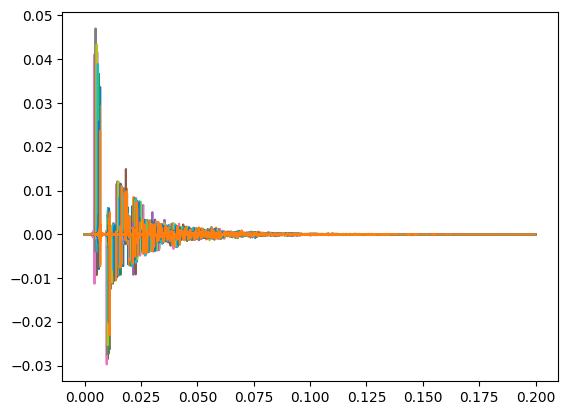

In [20]:
### src1, src2
# 원거리 상황 가정: 마이크 간 거리 < 마이크에서 소스까지의 거리
fs = 48000
nb_src = 2
nb_rcv = 6

# Room
x, y, z = 6, 6, 3
room_sz = [x, y, z]     # room size [m]

# receivers
x_rcv, y_rcv, z_rcv = 3, 3, 1.5
pos_rcv = np.array([[x_rcv-0.6, y_rcv, z_rcv],[x_rcv-0.4, y_rcv, z_rcv],[x_rcv-0.2, y_rcv, z_rcv], [x_rcv, y_rcv, z_rcv], [x_rcv+0.2, y_rcv, z_rcv], [x_rcv+0.4, y_rcv, z_rcv]])

# sources
src_dist = 2
# pos1_angle, pos2_angle = -math.pi/6, math.pi/6 
pos1_angle, pos2_angle = math.pi/3, math.pi/2+math.pi/3
pos_src1 = [x_rcv + src_dist*math.cos(pos1_angle), x_rcv + src_dist*math.sin(pos1_angle), z_rcv]
pos_src2 = [x_rcv + src_dist*math.cos(pos2_angle), x_rcv + src_dist*math.sin(pos2_angle), z_rcv]
pos_src = np.array([pos_src1, pos_src2])

# config etc
t60 = 0.2
att_diff = 15.0	
att_max = 60.0 

Tdiff= gpuRIR.att2t_SabineEstimator(att_diff, t60) 
Tmax = gpuRIR.att2t_SabineEstimator(att_max, t60)	

beta = gpuRIR.beta_SabineEstimation(room_sz, t60)
nb_img = gpuRIR.t2n(t60, room_sz)
RIRs = gpuRIR.simulateRIR(room_sz, beta, pos_src, pos_rcv, nb_img, t60, fs)

t = np.arange(int(ceil(Tmax * fs))) / fs
plt.plot(t, RIRs.reshape(nb_src*nb_rcv, -1).transpose())
plt.show()

In [21]:
print(pos_src)
print(pos_rcv)

[[4.         4.73205081 1.5       ]
 [1.26794919 4.         1.5       ]]
[[2.4 3.  1.5]
 [2.6 3.  1.5]
 [2.8 3.  1.5]
 [3.  3.  1.5]
 [3.2 3.  1.5]
 [3.4 3.  1.5]]


In [22]:
### 수정 코드
from scipy.io import wavfile

folder = "RIR"
subfolder = "src"

# RIR 스케일링
# max_val = np.max(np.abs(RIRs))
# scaled_RIRs = RIRs / max_val

for src_idx in range(nb_src):
    filepath1=os.path.join(folder,subfolder+str(src_idx+1))
    for rcv_idx in range(nb_rcv):
        # 소스-마이크 쌍에 대한 파일 이름 생성
        filename = f"RIR_3ch_src{src_idx+1}_rcv{rcv_idx+1}.wav"
        # 생성 파일 저장 경로 지정
        filepath2 = os.path.join(filepath1, filename)
        # WAV 파일로 RIR 저장
        wavfile.write(filepath2, fs, RIRs[src_idx][rcv_idx])

print("RIR wavfile 생성 완료")

RIR wavfile 생성 완료
